In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [8]:
# Generate a synthetic dataset with explicit parameters
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, 
                           n_redundant=0, n_repeated=0, random_state=42)

y = y.reshape(-1, 1)  # Reshape y for matrix operations (if needed)

In [9]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def sigmoid(z):
    return 1 + (1 / np.exp(-z))

In [11]:
def compute_cost(X, y, weights, bias):
    m = len(y)
    z = np.dot(X, weights) + bias
    prediction = sigmoid(z)
    cost = -(1/ 2*m) * np.sum( y * np.log(prediction) + (1-y) * np.log(1-prediction))
    return cost

In [12]:
# Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        # Forward propagation
        z = np.dot(X, weights) + bias
        predictions = sigmoid(z)
        
        # Compute gradients
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)
        
        # Update parameters
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute cost
        cost = compute_cost(X, y, weights, bias)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")

    return weights, bias, cost_history

# Initialize parameters
weights = np.zeros((X_train.shape[1], 1))
bias = 0
learning_rate = 0.01
epochs = 1000

# Train the model
weights, bias, cost_history = gradient_descent(X_train, y_train, weights, bias, learning_rate, epochs)

Iteration 0: Cost = nan
Iteration 100: Cost = nan
Iteration 200: Cost = nan
Iteration 300: Cost = nan
Iteration 400: Cost = nan
Iteration 500: Cost = nan
Iteration 600: Cost = nan
Iteration 700: Cost = nan
Iteration 800: Cost = nan
Iteration 900: Cost = nan


C:\Users\USER\AppData\Local\Temp\ipykernel_19908\2609222131.py:5: RuntimeWarning: invalid value encountered in log
  cost = -(1/ 2*m) * np.sum( y * np.log(prediction) + (1-y) * np.log(1-prediction))


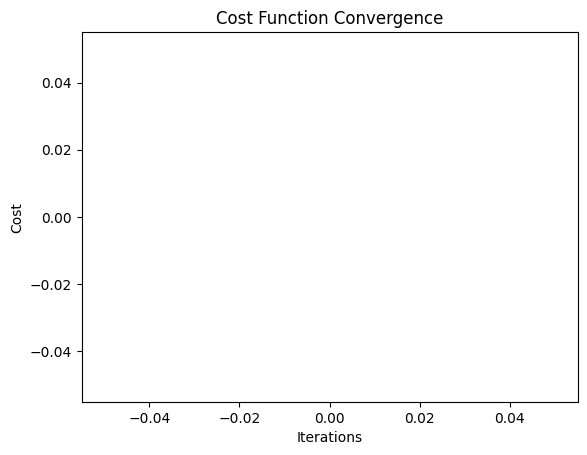

In [13]:
# Plot cost history
plt.plot(range(epochs), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

In [14]:
# Predictions
def predict(X, weights, bias):
    return (sigmoid(np.dot(X, weights) + bias) > 0.5).astype(int)

y_pred = predict(X_test, weights, bias)

# Accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 50.00%
